In [1]:
from scipy.signal import butter, sosfilt, sosfreqz
import wfdb
import pickle
import os

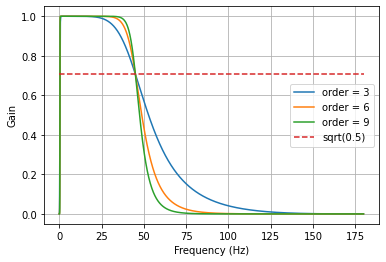

In [2]:
def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y


import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 360.0
lowcut = 0.4
highcut = 45.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = sosfreqz(sos, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

In [3]:
files = [x[:x.find(".")] for x in os.listdir("../data/files/mitdb/1.0.0") if x.endswith(".dat")]

In [4]:
data = [] 

for file in files:
    #print(file)
    record = wfdb.io.rdrecord("../data/files/mitdb/1.0.0/%s" %file)
    annotation = wfdb.io.rdann("../data/files/mitdb/1.0.0/%s" %file, extension = "atr")
    listy = list(zip(annotation.symbol, annotation.sample))
    #wfdb.plot_items(record.p_signal[:1000])
    y = butter_bandpass_filter(record.p_signal, lowcut, highcut, fs, order=5)
    #wfdb.plot_items(y)
    data.append((y, listy))
    
with open("prepro.data", "wb") as out:
        pickle.dump(data, out) 

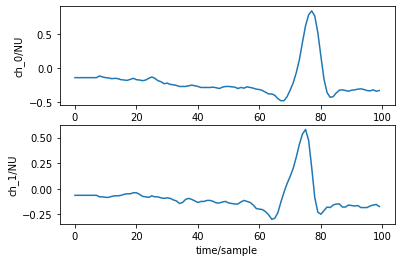

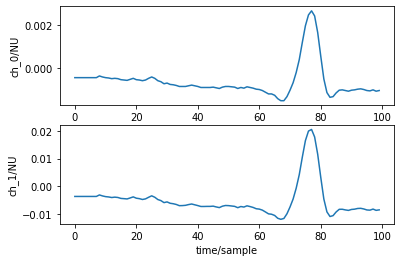

In [5]:
# Filter a noisy signal.
record = wfdb.io.rdrecord("../data/files/mitdb/1.0.0/100")
annotation = wfdb.io.rdann("../data/files/mitdb/1.0.0/100", extension = "atr")
wfdb.plot_items(record.p_signal[:100])
y = butter_bandpass_filter(record.p_signal[:100], lowcut, highcut, fs, order=5)
wfdb.plot_items(y)